<a href="https://colab.research.google.com/github/CrispyJLoHalo/CrispyJLoHalo/blob/main/PredMod/Week2/20240326_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A) Case study data exploration and simple linear regression

## Part 1 (see textbook, Exercise 2.4.9)

### Loading the relevant modules and the data
Please run the cells below

In [2]:
# Run this cell to install ISLP pacakge
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.7 MB/s eta 0:00:

In [1]:
# Run this cell to import packages needed in this lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [2]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                  summarize)

In [3]:
Auto = load_data('Auto')

In [4]:
isinstance(Auto, pd.DataFrame)

True

In [5]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Task 1.1:
Which of the predictors are quantitative, and which are qualitative?  
Qualitative


*   Origin
*   Name

Quantitative

*   mpg
*   cylinders
*   Displacement
*   Horsepower
*   Weight
*   Acceleration
*   Year





*Your answer here*

### Task 1.2:
What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in `numpy`.

In [6]:
# your code here
predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year']

for i, predictor in enumerate(predictors):
  print(str(Auto.columns[i]) + " Max: " + str(np.max(Auto[predictor])))
  print(str(Auto.columns[i]) + " Min: " + str(np.min(Auto[predictor])))

mpg Max: 46.6
mpg Min: 9.0
cylinders Max: 8
cylinders Min: 3
displacement Max: 455.0
displacement Min: 68.0
horsepower Max: 230
horsepower Min: 46
weight Max: 5140
weight Min: 1613
acceleration Max: 24.8
acceleration Min: 8.0
year Max: 82
year Min: 70


### Task 1.3:
What is the mean and standard deviation of each quantitative predictor?

In [7]:
# your code here
for i, predictor in enumerate(predictors):
  print(str(Auto.columns[i]) + " Mean: " + str(np.mean(Auto[predictor])))
  print(str(Auto.columns[i]) + " Std : " + str(np.std(Auto[predictor])))

mpg Mean: 23.445918367346938
mpg Std : 7.795045762682584
cylinders Mean: 5.471938775510204
cylinders Std : 1.7036061141501955
displacement Mean: 194.41198979591837
displacement Std : 104.51044418133284
horsepower Mean: 104.46938775510205
horsepower Std : 38.44203271442593
weight Mean: 2977.5841836734694
weight Std : 848.3184465698362
acceleration Mean: 15.541326530612244
acceleration Std : 2.7553429127509967
year Mean: 75.9795918367347
year Std : 3.6790348996151727


### Task 1.4:
Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [8]:
new_Auto = Auto.drop(Auto.loc[10:85].index)
for i, predictor in enumerate(predictors):
  print(str(Auto.columns[i]) + " Max: " + str(np.max(Auto[predictor])))
  print(str(Auto.columns[i]) + " Min: " + str(np.min(Auto[predictor])))
  print(str(Auto.columns[i]) + " Mean: " + str(np.mean(Auto[predictor])))
  print(str(Auto.columns[i]) + " Std : " + str(np.std(Auto[predictor])))

mpg Max: 46.6
mpg Min: 9.0
mpg Mean: 23.445918367346938
mpg Std : 7.795045762682584
cylinders Max: 8
cylinders Min: 3
cylinders Mean: 5.471938775510204
cylinders Std : 1.7036061141501955
displacement Max: 455.0
displacement Min: 68.0
displacement Mean: 194.41198979591837
displacement Std : 104.51044418133284
horsepower Max: 230
horsepower Min: 46
horsepower Mean: 104.46938775510205
horsepower Std : 38.44203271442593
weight Max: 5140
weight Min: 1613
weight Mean: 2977.5841836734694
weight Std : 848.3184465698362
acceleration Max: 24.8
acceleration Min: 8.0
acceleration Mean: 15.541326530612244
acceleration Std : 2.7553429127509967
year Max: 82
year Min: 70
year Mean: 75.9795918367347
year Std : 3.6790348996151727


### Task 1.5:
Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

In [9]:
# your code here
labels = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year']
Auto_only_quant = Auto.drop(columns=['origin', 'name'])
Auto_only_quant.corr().style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


### Task 1.6:
Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

The correlation matrix suggests that predictors such as **displacement**, **horsepower** and **weight** may be useful in predicting mpg.

## Part 2 (see textbook Exercise 3.7.9)

*Your answer here*

### Task 2.1:
Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use
the `summarize()` function to print the results. Comment on the output.

For example:
1. Is there a relationship between the predictor
and the response?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. What is the predicted mpg associated with a horsepower of 98?
5. What are the associated 95 % confidence and prediction intervals?

In [10]:
# your code here
design = MS(['horsepower'])
X = design.fit_transform(Auto)
Y = Auto['mpg']

model = sm.OLS(Y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        10:14:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

1. Is there a relationship between the predictor
and the response?  
Yes, there is. At level of significance 0.05 we have evidence that there is a relationship between hp and mpg.
2. How strong is the relationship between the predictor and the response?  
Around 61% of variablity of the data is explained by our model, so there is quite a strong relationship. (Depends nonetheless)
3. Is the relationship between the predictor and the response positive or negative?  
Negative
4. What is the predicted mpg associated with a horsepower of 98?  
See code below
5. What are the associated 95 % confidence and prediction intervals?  
See code below

In [12]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.fit_transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [13]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

In [14]:
#Plausibility Check
39.9359-0.1578*98

24.4715

Question 5 from above

In [15]:
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

### Task 2.2:
Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

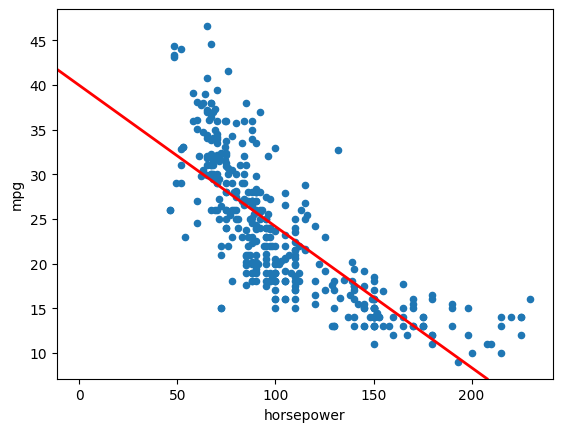

In [35]:
# your code here
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.axline((0, results.params['intercept']), slope=results.params['horsepower'], linewidth=2, color='r')

# B) Simulation study: investigating the effect of noise
(see textbook Exercise 3.7.13)

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

## Task 3.1:
Using the `normal()` method of [your random number generator](https://numpy.org/doc/stable/reference/random/generator.html) (`np.random.default_rng()`), create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, `X`.

In [20]:
# your code here
rng = np.random.default_rng(1)
x = rng.normal(scale=1,size=100)
X

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150
4,1.0,140
...,...,...
387,1.0,86
388,1.0,52
389,1.0,84
390,1.0,79


## Task 3.2:
Using the `normal()` method, create a vector, `eps`, containing 100
observations drawn from a $N(0, 0.25)$ distribution — a normal
distribution with mean zero and variance $0.25$.

In [22]:
# your code here
eps = rng.normal(scale=0.5, size=100)
eps

array([-3.25640506e-01,  4.31222398e-01, -6.27960420e-02,  3.34576620e-01,
        6.09421803e-01,  1.91464791e-01, -4.37860572e-01, -7.57159316e-01,
        8.76692059e-01, -5.56460966e-02, -3.44282474e-01,  7.21285440e-02,
       -9.57056652e-02,  4.26071132e-01,  1.69640912e-02,  6.87479181e-03,
       -3.57289861e-01,  2.34784049e-01, -5.16933361e-01,  3.32944720e-01,
        7.61968756e-01, -7.62343019e-01, -1.23311462e+00,  3.08439378e-01,
        1.27394891e+00, -5.00462424e-01, -6.25347879e-01,  2.94484467e-01,
       -4.20360795e-01, -2.53012742e-01, -1.74058733e-01,  2.66001043e-01,
       -2.02651181e-01,  1.38941420e-01, -8.82666294e-02, -4.22335552e-01,
       -1.59913129e-01, -4.75199833e-01,  3.25749293e-03, -5.61933114e-01,
       -5.46447185e-01,  7.28480908e-01, -2.65921102e-02, -2.69510127e-02,
        2.55768210e-01, -2.10428501e-01, -1.14267684e-01,  2.12574368e-01,
        1.41207921e-01, -5.79648363e-01,  4.16671298e-01, -2.95217472e-01,
       -5.28039475e-01, -

## Task 3.3:
Using `x` and `eps`, generate a vector `y` according to the model
$$Y = −1 + 0.5X + \varepsilon.$$
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [23]:
# your code here
y = -1 + 0.5*x + eps
y

array([-1.15284841, -0.15796853, -0.8975775 , -1.317002  ,  0.06209974,
       -0.58534792, -1.70633719, -1.46660026,  0.05897826, -0.90857985,
       -1.33007135, -0.65451496, -1.46393271, -0.65538384, -1.22409557,
       -0.6937021 , -1.33742881, -0.91144433, -1.90788759, -0.7956514 ,
       -0.23396015, -1.90014447, -1.58608271, -0.18819846, -1.08163233,
       -2.44496905, -1.71273393, -0.91661074, -1.3135393 , -1.14435178,
       -0.11513936, -1.29000934, -1.39145368,  0.16032722, -0.76491513,
       -1.09080387, -1.41691631, -2.29923742, -0.91301013, -1.50742607,
       -2.16012321, -0.61313242, -1.06261395, -1.49932682, -0.79336677,
       -1.16268699, -1.09647457, -1.04057146, -0.56191804, -1.13406489,
       -0.42290455, -1.70433259, -1.16221333, -1.70095754, -0.75569236,
       -0.72224358, -1.13053435, -0.92999378, -2.69328662, -1.1577332 ,
       -0.52316565, -0.98193599, -1.80577152, -1.43793099, -0.55013186,
       -0.90154602,  0.10398973, -0.5156565 , -2.12059873, -0.93

## Task 3.4:
Create a scatterplot displaying the relationship between `x`and `y`. Comment on what you observe.

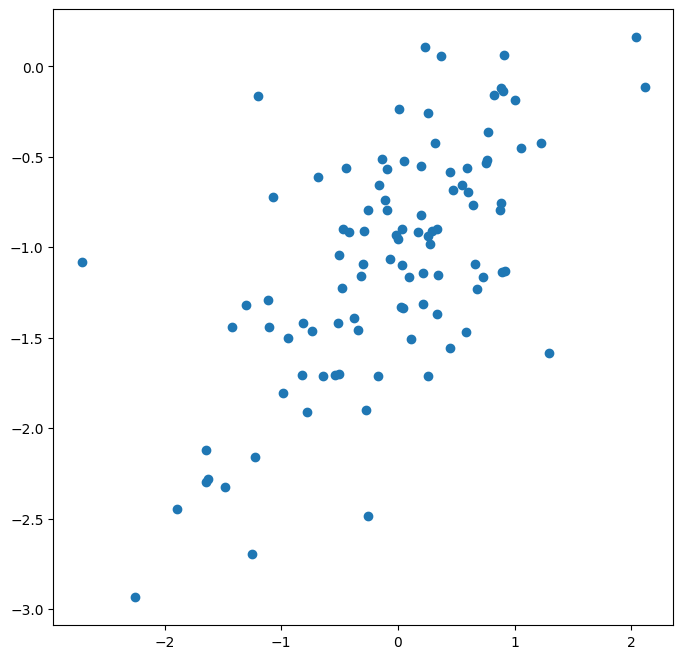

In [24]:
# your code here
fig,ax =plt.subplots(figsize =(8,8))
ax.scatter(x,y)

## Task 3.5:
Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?

In [25]:
# your code here
X = pd.DataFrame({'intercept': np.ones(100), 'x':x})
X

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356
...,...,...
95,1.0,-2.250854
96,1.0,-0.138655
97,1.0,0.033000
98,1.0,-1.425349


In [39]:
model=sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
x,0.4843,0.059,8.233,0.0


## Task 3.6:
Display the least squares line on the scatterplot obtained in Task 3.4. Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

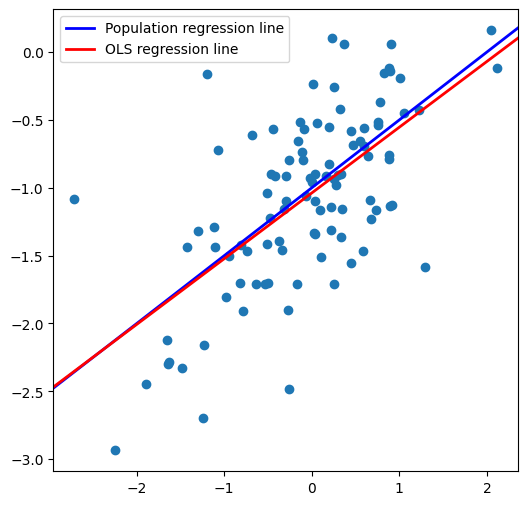

In [42]:
# your code here
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x,y)
line1 = ax.axline((0,-1), slope=0.5, linewidth=2, color='b');
line2 = ax.axline((0, results.params['intercept']),
                  slope =results.params['x'],
                  linewidth=2,
                  color='r');
ax.legend([line1, line2], ['Population regression line', 'OLS regression line'])

## Task 3.7:
Repeat Steps 3.1 to 3.6 after modifying the data generation process in such a way that there is *less* noise in the data. The true model should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the error term $\varepsilon$ in Task 3.2. Describe your results.

In [ ]:
# your code here

## Task 3.7:
Repeat Steps 3.1 to 3.6 after modifying the data generation process in such a way that there is *more* noise in the data. The true model should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the error term $\varepsilon$ in Task 3.2. Describe your results.

In [ ]:
# your code here

# C) Extending the case study from A) by including multiple regressors into the model

(see textbook Exercise 3.7.9)

## Task 4.1:
Produce a scatterplot matrix which includes all of the variables
in the data set.

In [ ]:
# your code here

## Task 4.2:
Compute the matrix of correlations between the variables using
the `DataFrame.corr()` method.

In [ ]:
# your code here

## Task 4.3:
Use the `sm.OLS()` function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the `summarize()` function to print the results.
Comment on the output. For instance:
1. Is there a relationship between the predictors and the response?
Use the `summary()` method from `statsmodels` to answer this question.
2. Which predictors appear to have a statistically significant
relationship to the response?
3. What does the coefficient for the year variable suggest?

In [ ]:
# your code here